In [1]:
import pandas as pd
import dask as dd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression

import statsmodels.api as sm
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy import stats

/usr/local/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
df = pd.read_csv('data/jvf_data_realDist.csv')
df['da'] = pd.to_datetime(df['da'])
df = df.set_index('da', drop=True)
df['jvf'] = df['jvf'].map({'Yes': 1, 'No': 0})

In [5]:
y = df['jvf']
X = df['disc_dist']
X_constant = sm.add_constant(X, prepend=False)

In [6]:
logit_model = GLM(y, X_constant, family=families.Binomial())
logit_results = logit_model.fit()
print(logit_results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    jvf   No. Observations:                  989
Model:                            GLM   Df Residuals:                      987
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -601.23
Date:                Tue, 07 Jun 2022   Deviance:                       1202.5
Time:                        14:24:41   Pearson chi2:                     986.
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03649
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
disc_dist      0.0003   5.84e-05      5.950      0.0

<AxesSubplot:xlabel='disc_dist', ylabel='jvf'>

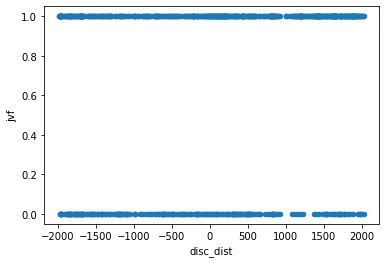

In [8]:
df.plot.scatter(x='disc_dist', y="jvf")